In [15]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
# import PIL

In [16]:
# import data
folder="./dataset"
transform = transforms.Compose([transforms.ToTensor()])
data_train_val=torchvision.datasets.FashionMNIST(root=folder,train=True,download=True,transform=transform)
data_test=torchvision.datasets.FashionMNIST(root=folder,train=False,download=True,transform=transform)

In [17]:
classes=data_test.classes

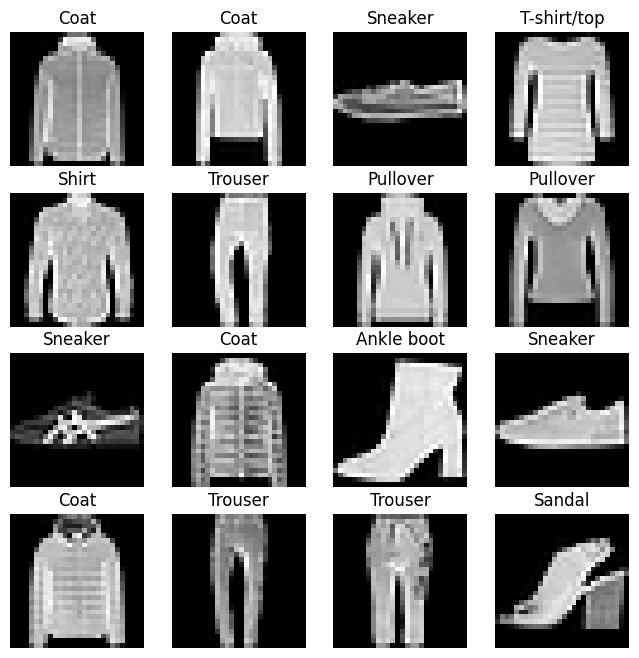

In [18]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
cols, rows = 4, 4
ids=torch.randint(len(data_test), size = (cols*rows,))
for i in range (1, cols*rows + 1):
    image, label = data_test[ids[i-1].item()]
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    # plt.imshow(image.squeeze())
plt.show()

In [19]:
data_test.data[1].shape

torch.Size([28, 28])

### Data Preparation (10 points)
- (a) Data cleansing and transformation (5 points)

In [36]:
# transform images size 28,28 to 224,224

from torchvision.transforms.functional import InterpolationMode
# data_transform = transforms.Compose(
#     [transforms.ToPILImage(),
#     transforms.Resize((224, 224), interpolation=PIL.Image.NEAREST), 
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[.5], std=[.5])])
data_transform = transforms.Compose(
    [ 
    transforms.Resize((224, 224))])
# data_train_val=torchvision.datasets.FashionMNIST(root=folder,train=True,download=True,transform=data_transform)
# data_test=torchvision.datasets.FashionMNIST(root=folder,train=False,download=True,transform=data_transform)
# data_transform(data_test.data)

# reshape torch.Size([10000, 28, 28]) to torch.Size([10000,1, 28, 28])
# data_transform=transforms.Resize((224, 224))
temp=data_transform(data_test.data)
data_test.data=temp
temp.shape
# temp=data_test.data
# transform(temp)

/home/percool/anaconda3/envs/fashion/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([10000, 224, 224])

- (b) Data splitting (i.e., training, validation, and test splits) (5 points)

In [45]:

set_train, set_val = torch.utils.data.random_split(data_train_val, [50000, 10000])
len(set_train.indices)
type(set_val)
batch_size=64
loader_train = torch.utils.data.DataLoader(set_train, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
loader_val = torch.utils.data.DataLoader(set_val, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
loader_test = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [ ]:
data_train_val.data[1].shape


torch.Size([28, 28])

In [39]:
device ='cuda' if torch.cuda.is_available else 'cpu'
print(f'Using {device} device')

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# For now, use cpu as device
# device = 'cpu'
model = NeuralNetwork().to(device)
print(model.parameters())

Using cuda device
<generator object Module.parameters at 0x7ff2e7f4d000>


In [40]:
# model = torch.hub.load('pytorch/vision:v0.10.0', 'wide_resnet50_2', pretrained=True)
model=torchvision.models.vgg16()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [41]:
# model.conv1=torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.features[0]=torch.nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
model=model.to(device)
model

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [42]:
# Define hyperparameters
learning_rate = 1e-3
epochs = 50

# Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
def trainloop (dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device),y.to(device)
        
        # Compute the error rate
        prediction = model(X)
        loss = loss_fn(prediction, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')
            
def evaluate (dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            X,y = X.to(device),y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [46]:
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    trainloop(loader_test, model, loss_fn, optimizer)
    evaluate(loader_test, model, loss_fn)

Epoch 1
-------------------------------
loss:6.920846 [    0/10000]
loss:2.093692 [ 6400/10000]
Test Error: 
 Accuracy: 45.5%, Avg loss: 1.367590 

Epoch 2
-------------------------------
loss:1.913354 [    0/10000]
loss:1.246891 [ 6400/10000]
Test Error: 
 Accuracy: 59.5%, Avg loss: 0.971301 

Epoch 3
-------------------------------
loss:1.012205 [    0/10000]
loss:0.845866 [ 6400/10000]
Test Error: 
 Accuracy: 71.5%, Avg loss: 0.765551 

Epoch 4
-------------------------------
loss:0.774511 [    0/10000]
loss:0.834209 [ 6400/10000]
Test Error: 
 Accuracy: 73.8%, Avg loss: 0.704133 

Epoch 5
-------------------------------
loss:0.920114 [    0/10000]
loss:0.848943 [ 6400/10000]
Test Error: 
 Accuracy: 73.2%, Avg loss: 0.719839 

